In [32]:
'''
Objectives (from https://piazza.com/class/ktuxvlqye5v3tz?cid=82):

First, we're asking you to build a predictive model for future sales of a particular product.
You'll want to use the entire market dataset to help train the model, but ultimately you want
to be able to plug in a specific product and generate a sales forecast. The obvious use-case
here is Cookies is trying to project out potential demand so they can make immediate decisions
in terms of investment and cultivation. We don't offer a precise prediction window (monthly,
quarterly etc.) but monthly projections are probably a good way to start. 

The second objective is to identify key features associated with high sales performance. There
are multiple ways to go about this but the easiest is to examine statistical significance and
coefficient magnitude associated with individual features. The practical goal here is to offer
market trends and advice on product areas where Cookies may want to develop new product lines
to meet pent up demand.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

np.random.seed(42)

In [33]:
price = pd.read_csv('data/BrandAverageRetailPrice.csv')
details = pd.read_csv('data/BrandDetails.csv')
sales = pd.read_csv('data/BrandTotalSales.csv')
units = pd.read_csv('data/BrandTotalUnits.csv')

# storing all of the dataframes in a dictionary for easier use
dfs = {
    'price': price,
    'details': details,
    'sales': sales,
    'units': units,
}

In [34]:
price

,Brands,Months,ARP,vs. Prior Period
0,#BlackSeries,08/2020,15.684913,NaN
1,#BlackSeries,09/2020,NaN,-1.000000
2,#BlackSeries,01/2021,13.611428,NaN
3,#BlackSeries,02/2021,11.873182,-0.127705
4,#BlackSeries,03/2021,NaN,-1.000000
...,...,...,...,...
27206,Zuma Topicals,08/2019,31.598214,NaN
27207,Zuma Topicals,09/2019,37.860964,0.198199
27208,Zuma Topicals,10/2019,34.546154,-0.087552
27209,Zuma Topicals,11/2019,36.850000,0.066689


In [35]:
details

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
0,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),"1,103.964857",...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
1,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),674.645211,...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
2,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"2,473.699102",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
3,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"14,589.916417",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
4,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Afghan Kush - Wax,145.39627,...,0,0,THC Only,NaN,Afghan Kush,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144972,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"3,051.854478",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$40.00 to $44.99
144973,California,Licensed,Inhaleables,Pre-Rolled,Pre-Rolled,NaN,NaN,Zkittlez,"Zkittlez - Blueberry Zkittlez - Pre-Rolled, 0....","6,776.219336",...,0,0,THC Only,NaN,Blueberry Zkittlez,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99
144974,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"4,341.808787",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$45.00 to $49.99
144975,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"6,764.1640020000000",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$60.00 to $64.99


In [36]:
sales

,Months,Brand,Total Sales ($)
0,09/2018,10x Infused,"1,711.334232"
1,09/2018,1964 Supply Co.,"25,475.21594500000"
2,09/2018,3 Bros Grow,"120,153.644757"
3,09/2018,3 Leaf,"6,063.5297850000000"
4,09/2018,350 Fire,"631,510.0481550000"
...,...,...,...
25274,09/2021,Yummi Karma,"458,600.9132630000"
25275,09/2021,Zanna,"3,681.159375"
25276,09/2021,Zendo Edibles,"11,508.213813"
25277,09/2021,Zig Zag,"18,077.309311"


In [37]:
units

,Brands,Months,Total Units,vs. Prior Period
0,#BlackSeries,08/2020,"1,616.3390040000000",NaN
1,#BlackSeries,09/2020,NaN,-1.000000
2,#BlackSeries,01/2021,715.5328380000000,NaN
3,#BlackSeries,02/2021,766.669135,0.071466
4,#BlackSeries,03/2021,NaN,-1.000000
...,...,...,...,...
27681,Zuma Topicals,08/2019,312.5153360000000,NaN
27682,Zuma Topicals,09/2019,464.30631600000000,0.485707
27683,Zuma Topicals,10/2019,348.057905,-0.250370
27684,Zuma Topicals,11/2019,135.92208,-0.609484


In [38]:
price.describe(include='all')

,Brands,Months,ARP,vs. Prior Period
count,27211,27211,25279.000000,24499.000000
unique,1627,37,NaN,NaN
top,Blue River Extracts,06/2021,NaN,NaN
freq,37,909,NaN,NaN
mean,NaN,NaN,22.679732,-0.065028
std,NaN,NaN,19.802724,0.388923
min,NaN,NaN,0.000000,-1.000000
25%,NaN,NaN,10.512827,-0.088073
50%,NaN,NaN,17.033051,-0.011649
75%,NaN,NaN,31.505612,0.045232


In [39]:
details.describe(include='all')

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
count,144977,144977,144977,144977,144245,102618,50135,144977,144977,144977,...,144977,144977,144977,44301,115639,11287,144977,144977,144977,144977
unique,1,1,5,13,53,71,38,1123,32608,133144,...,136,149,2,2,5824,2,2,2,2,22
top,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Raw Garden,"Pre Rolled - Strain Blends - Pre-Rolled, 1.00g...",168.17203,...,0,0,THC Only,Not Pax,Hybrid Strain Blends,Flavored,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$25.00 to $29.99
freq,144977,144977,121859,83534,44301,38488,19962,9004,790,136,...,130154,138362,134332,42135,4936,7807,137990,137370,138667,13832
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
sales.describe(include='all')

,Months,Brand,Total Sales ($)
count,25279,25279,25279
unique,37,1627,25277
top,05/2021,Valhalla,0
freq,848,37,3


In [41]:
units.describe(include='all')

,Brands,Months,Total Units,vs. Prior Period
count,27686,27686,25712,24935.000000
unique,1640,38,24494,NaN
top,Absolute Xtracts,06/2021,25.131084000000000,NaN
freq,38,909,6,NaN
mean,NaN,NaN,NaN,0.265306
std,NaN,NaN,NaN,3.291373
min,NaN,NaN,NaN,-1.000000
25%,NaN,NaN,NaN,-0.351822
50%,NaN,NaN,NaN,-0.055216
75%,NaN,NaN,NaN,0.240113


In [42]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Months           25279 non-null  object
 1   Brand            25279 non-null  object
 2   Total Sales ($)  25279 non-null  object
dtypes: object(3)
memory usage: 592.6+ KB


In [43]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27211 entries, 0 to 27210
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            27211 non-null  object 
 1   Months            27211 non-null  object 
 2   ARP               25279 non-null  float64
 3   vs. Prior Period  24499 non-null  float64
dtypes: float64(2), object(2)
memory usage: 850.5+ KB


In [44]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144977 entries, 0 to 144976
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State                144977 non-null  object 
 1   Channel              144977 non-null  object 
 2   Category L1          144977 non-null  object 
 3   Category L2          144977 non-null  object 
 4   Category L3          144245 non-null  object 
 5   Category L4          102618 non-null  object 
 6   Category L5          50135 non-null   object 
 7   Brand                144977 non-null  object 
 8   Product Description  144977 non-null  object 
 9   Total Sales ($)      144977 non-null  object 
 10  Total Units          144977 non-null  object 
 11  ARP                  144977 non-null  float64
 12  Flavor               7807 non-null    object 
 13  Items Per Pack       144977 non-null  int64  
 14  Item Weight          64454 non-null   object 
 15  Total THC        

In [45]:
units.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27686 entries, 0 to 27685
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            27686 non-null  object 
 1   Months            27686 non-null  object 
 2   Total Units       25712 non-null  object 
 3   vs. Prior Period  24935 non-null  float64
dtypes: float64(1), object(3)
memory usage: 865.3+ KB


## 1. Merging datasets
Merging datasets and linking information into a single dataframe for analysis.

Since `details` was the only dataframe with any columns with a single unique value, we can drop all of these columns since they are redundant.

In [46]:
def drop_identical_data(df):
    '''
    Drop columns that contain only 1 unique value.
    
    Args:
        df: Dataframe
    Returns:
        Dataframe with columns that have 2 or more unique
        values each.
    '''
    for column in df.columns:
        if len(df[column].unique()) == 1:
            df = df.drop(column, axis=1)
            print(f'Dropped {column}')
    return df

for i in dfs:
    dfs[i] = drop_identical_data(dfs[i])

Dropped State
Dropped Channel


For consistency, renaming `Brands` to `Brand` and placing `Brand` column at the start of every dataframe.

In [47]:
def move_to_front(label, df):
    '''
    Moves column `label` to the front of the dataframe. If label
    doesn't exist, it will return `df` untouched.
    
    Args:
        column: str
        df: Dataframe
    Returns:
        Dataframe with `label` in the front (index 0)
    '''
    if label not in df.columns: return df
    column = df[label]
    df = df.drop(label, axis=1)
    df.insert(0, label, column)
    return df

# renaming brands to brand
for i in dfs:
    if 'Brands' in dfs[i].columns:
        dfs[i] = dfs[i].rename(columns={'Brands': 'Brand'})
        
# reording columns
for i in dfs:
    dfs[i] = move_to_front('Brand', dfs[i])


In [48]:
for i in dfs:
    print(i, dfs[i].columns)

price Index(['Brand', 'Months', 'ARP', 'vs. Prior Period'], dtype='object')
details Index(['Brand', 'Category L1', 'Category L2', 'Category L3', 'Category L4',
       'Category L5', 'Product Description', 'Total Sales ($)', 'Total Units',
       'ARP', 'Flavor', 'Items Per Pack', 'Item Weight', 'Total THC',
       'Total CBD', 'Contains CBD', 'Pax Filter', 'Strain', 'Is Flavored',
       'Mood Effect', 'Generic Vendor', 'Generic Items', '$5 Price Increment'],
      dtype='object')
sales Index(['Brand', 'Months', 'Total Sales ($)'], dtype='object')
units Index(['Brand', 'Months', 'Total Units', 'vs. Prior Period'], dtype='object')


Since sales are the most important part, we will start with the `sales` dataframe to construct our main dataframe. From there we will add the `price` and `units` dataframes because they are the most similar (they all have `Brand` and `Months` columns).

In [49]:
# merge sales and price into df (and rename `vs. Prior Period` to `vs. Prior Period (ARP)`
df = pd.merge(dfs['sales'], dfs['price'], on=['Brand', 'Months'], how='left')
# merge df and units into df
df = pd.merge(df, dfs['units'], on=['Brand', 'Months'], how='left')
# renaming `vs. Prior Period` columns
df = df.rename(columns={
    'vs. Prior Period_x': 'vs. Prior Period (ARP)',
    'vs. Prior Period_y': 'vs. Prior Period (units)',
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 25278
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     25279 non-null  object 
 1   Months                    25279 non-null  object 
 2   Total Sales ($)           25279 non-null  object 
 3   ARP                       25279 non-null  float64
 4   vs. Prior Period (ARP)    22570 non-null  float64
 5   Total Units               25279 non-null  object 
 6   vs. Prior Period (units)  22961 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


### Numeric Values
Convert `Total Sales ($)` and `Total Units` from a `str` column to a `float64` column.

In [50]:
df['Total Sales ($)'] = df['Total Sales ($)'].str.replace(',','').astype(float)
df['Total Units'] = df['Total Units'].str.replace(',','').astype(float)
df

,Brand,Months,Total Sales ($),ARP,vs. Prior Period (ARP),Total Units,vs. Prior Period (units)
0,10x Infused,09/2018,1711.334232,11.980833,NaN,142.839336,-0.833098
1,1964 Supply Co.,09/2018,25475.215945,10.634459,NaN,2395.534726,-0.184675
2,3 Bros Grow,09/2018,120153.644757,11.992592,NaN,10018.989140,-0.577103
3,3 Leaf,09/2018,6063.529785,5.507027,NaN,1101.053215,-0.672014
4,350 Fire,09/2018,631510.048155,9.847509,NaN,64128.910286,-0.216338
...,...,...,...,...,...,...,...
25274,Yummi Karma,09/2021,458600.913263,35.948296,-0.010775,12757.236391,-0.074458
25275,Zanna,09/2021,3681.159375,8.069769,NaN,456.166632,NaN
25276,Zendo Edibles,09/2021,11508.213813,15.983929,-0.009880,719.986537,-0.226109
25277,Zig Zag,09/2021,18077.309311,2.702687,-0.005564,6688.643227,-0.184473


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 25278
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     25279 non-null  object 
 1   Months                    25279 non-null  object 
 2   Total Sales ($)           25279 non-null  float64
 3   ARP                       25279 non-null  float64
 4   vs. Prior Period (ARP)    22570 non-null  float64
 5   Total Units               25279 non-null  float64
 6   vs. Prior Period (units)  22961 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.5+ MB


## 2. Time Series Extraction
Developing timeseries features to augment the dataset and to enable timeseries predictive models. 

In [52]:
df['Months'] = pd.to_datetime(df['Months'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 25278
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Brand                     25279 non-null  object        
 1   Months                    25279 non-null  datetime64[ns]
 2   Total Sales ($)           25279 non-null  float64       
 3   ARP                       25279 non-null  float64       
 4   vs. Prior Period (ARP)    22570 non-null  float64       
 5   Total Units               25279 non-null  float64       
 6   vs. Prior Period (units)  22961 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.5+ MB


To make the dataframe more reable, we can rename the `Months` column to `Date`.

In [53]:
df = df.rename(columns={'Months': 'Date'})
df

,Brand,Date,Total Sales ($),ARP,vs. Prior Period (ARP),Total Units,vs. Prior Period (units)
0,10x Infused,2018-09-01,1711.334232,11.980833,NaN,142.839336,-0.833098
1,1964 Supply Co.,2018-09-01,25475.215945,10.634459,NaN,2395.534726,-0.184675
2,3 Bros Grow,2018-09-01,120153.644757,11.992592,NaN,10018.989140,-0.577103
3,3 Leaf,2018-09-01,6063.529785,5.507027,NaN,1101.053215,-0.672014
4,350 Fire,2018-09-01,631510.048155,9.847509,NaN,64128.910286,-0.216338
...,...,...,...,...,...,...,...
25274,Yummi Karma,2021-09-01,458600.913263,35.948296,-0.010775,12757.236391,-0.074458
25275,Zanna,2021-09-01,3681.159375,8.069769,NaN,456.166632,NaN
25276,Zendo Edibles,2021-09-01,11508.213813,15.983929,-0.009880,719.986537,-0.226109
25277,Zig Zag,2021-09-01,18077.309311,2.702687,-0.005564,6688.643227,-0.184473


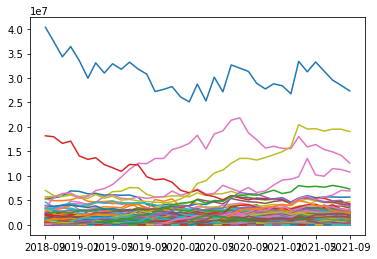

In [54]:
for brand in df['Brand'].unique():
    test_df = df[df['Brand'] == brand]
    plt.plot(test_df['Date'], test_df['Total Sales ($)'])

## 3. Statistics
Run basic statistics, including correlations with labels and report findings. Once we employ 'black box' methods such as PCA, the descriptive power of any of the features with disappear. However, this step is still important to report meaningful correlations to help flag key indicators.

In [55]:
df.corr()

,Total Sales ($),ARP,vs. Prior Period (ARP),Total Units,vs. Prior Period (units)
Total Sales ($),1.000000,-0.011343,-0.013147,0.875595,-0.017362
ARP,-0.011343,1.000000,0.095541,-0.076574,-0.040921
vs. Prior Period (ARP),-0.013147,0.095541,1.000000,-0.011783,-0.072535
Total Units,0.875595,-0.076574,-0.011783,1.000000,-0.007995
vs. Prior Period (units),-0.017362,-0.040921,-0.072535,-0.007995,1.000000


array([[<AxesSubplot:xlabel='Total Sales ($)', ylabel='Total Sales ($)'>,
        <AxesSubplot:xlabel='ARP', ylabel='Total Sales ($)'>,
        <AxesSubplot:xlabel='vs. Prior Period (ARP)', ylabel='Total Sales ($)'>,
        <AxesSubplot:xlabel='Total Units', ylabel='Total Sales ($)'>,
        <AxesSubplot:xlabel='vs. Prior Period (units)', ylabel='Total Sales ($)'>],
       [<AxesSubplot:xlabel='Total Sales ($)', ylabel='ARP'>,
        <AxesSubplot:xlabel='ARP', ylabel='ARP'>,
        <AxesSubplot:xlabel='vs. Prior Period (ARP)', ylabel='ARP'>,
        <AxesSubplot:xlabel='Total Units', ylabel='ARP'>,
        <AxesSubplot:xlabel='vs. Prior Period (units)', ylabel='ARP'>],
       [<AxesSubplot:xlabel='Total Sales ($)', ylabel='vs. Prior Period (ARP)'>,
        <AxesSubplot:xlabel='ARP', ylabel='vs. Prior Period (ARP)'>,
        <AxesSubplot:xlabel='vs. Prior Period (ARP)', ylabel='vs. Prior Period (ARP)'>,
        <AxesSubplot:xlabel='Total Units', ylabel='vs. Prior Period (ARP)'>,
   

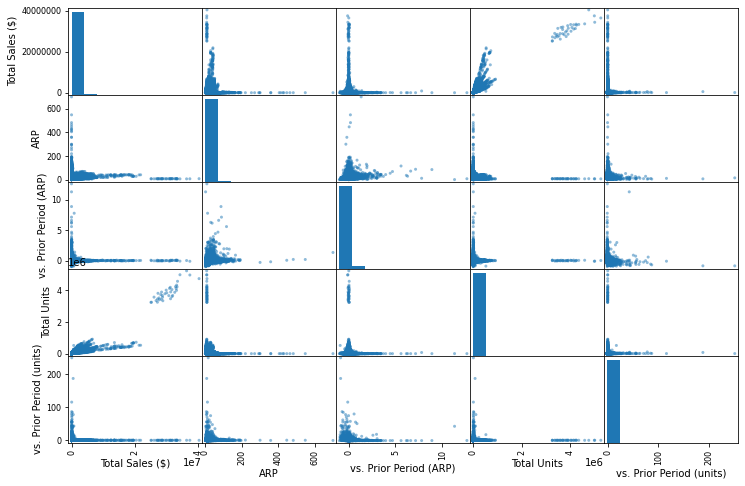

In [56]:
attributes = []
pd.plotting.scatter_matrix(df, figsize=(12, 8))
# save_fig("scatter_matrix_plot")

## 4. Additional feature extraction and implementation of comprehensive pipeline
Processing dataframe to prepare for modeling
1. Determine which fields to retain and which to drop
2. For those you retain, determine a categorization strategy
3. Determine an imputation strategy (you should choose more than one imputation method depending on the specifics of your data)
4. Augment at least one feature, ideally a feature cross, or non-linear transition
5. Determine a strategy for scaling features

In [57]:
# re-opening csv files for fresh start (put this code block after the pipeline has been implemented)
price = pd.read_csv('data/BrandAverageRetailPrice.csv')
details = pd.read_csv('data/BrandDetails.csv')
sales = pd.read_csv('data/BrandTotalSales.csv')
units = pd.read_csv('data/BrandTotalUnits.csv')

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

print('imported :-)')

imported :-)


In [118]:
num_features = ['ARP', 'vs. Prior Period (ARP)', 'Total Units', 'vs. Prior Period (units)']
cat_features = ['Brand']

# attr_adder = AugmentFeatures(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
#         ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

class DenseTransformer(TransformerMixin):
    '''
    https://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required
    '''
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

class NumpyTransformer(TransformerMixin):
    '''
    '''
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return np.asarray(X)

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ('to_dense', DenseTransformer()),
    ('numpy_array', NumpyTransformer()),
])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_features),
        # ('cat', cat_pipeline, cat_features),
    ])

df_unlabeled = df.drop('Total Sales ($)', axis=1)
labels = df['Total Sales ($)']

full_pipeline.fit_transform(df_unlabeled)

X = full_pipeline.transform(df_unlabeled)
y = labels

In [119]:
from sklearn.model_selection import train_test_split

# split X/y into: 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we can use this if we want to split train into a train set and dev set
# X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.median(y_train), np.mean(y_train), np.std(y_train))

y_test_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(np.median(y_test), np.mean(y_test), np.std(y_test))

# create pipeline with cat and without cat (seems like the performance difference is massively better without one hot encoding all the brands lol)


792891.9559992726
61738.537282 416128.38630782376 1634625.8319391296
645668.1882335288
64485.9592625 382352.0719072615 1430758.297309919


(array([1.9859e+04, 2.6000e+02, 2.2000e+01, 2.4000e+01, 1.8000e+01,
        9.0000e+00, 2.0000e+00, 1.2000e+01, 1.5000e+01, 2.0000e+00]),
 array([       0.        ,  3745214.35103359,  7490428.70206718,
        11235643.05310077, 14980857.40413436, 18726071.75516795,
        22471286.10620154, 26216500.45723513, 29961714.80826872,
        33706929.15930231, 37452143.5103359 ]),
 <BarContainer object of 10 artists>)

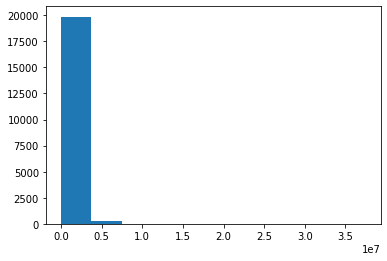

In [114]:
plt.hist(y_train)

In [117]:
X_train.shape

(20223, 1631)